<h4>About dataset</h4>

<p>This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland,
and Long Beach V. It contains 76 attributes, including the predicted attribute, 
but all published experiments refer to using a subset of 14 of them. The "target" 
field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.</p>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, recall_score, auc, RocCurveDisplay

C:\Users\pc\.conda\envs\tensorflow\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Reading Data
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

### Exploaratory Data Analysis

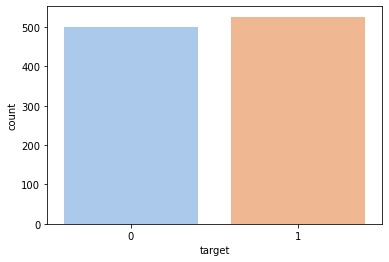

In [4]:
sns.countplot(x='target',data=df,palette='pastel')
plt.show()

In [5]:
print("Percentage of patients with Heart disease:{:.2f}%".format(len(df[df.target==1])*100/len(df.target)))

print("Percentage of patients with no Heart disease:{:.2f}%".format(len(df[df.target==0])*100/len(df.target)))

Percentage of patients with Heart disease:51.32%
Percentage of patients with no Heart disease:48.68%


In [6]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

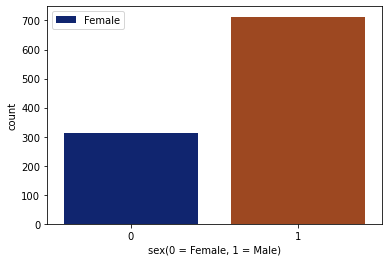

In [7]:
sns.countplot(x='sex',data=df,palette="dark")
plt.legend(["Female","Male"])
plt.xlabel('sex(0 = Female, 1 = Male)')
plt.show()

In [8]:
print("Percentage of Female Patients:{:.2f}%".format(len(df[df.sex==0])*100/len(df.sex)))
print("Percentage of Male Patients:{:.2f}%".format(len(df[df.sex==1])*100/len(df.sex)))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


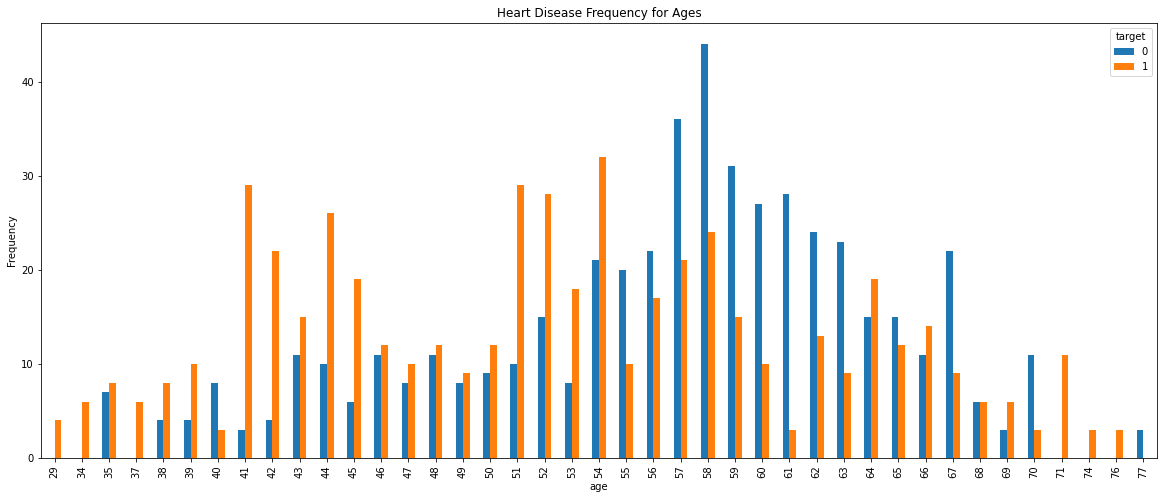

In [10]:
pd.crosstab(df.age,df.target).plot(kind='bar',figsize = (20, 8))
plt.title('Heart Disease Frequency for Ages')
plt.ylabel('Frequency')
plt.show()

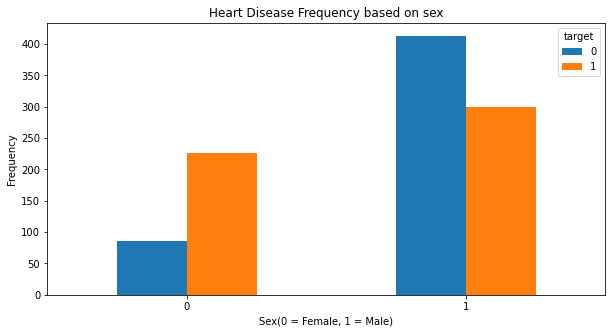

In [11]:
pd.crosstab(df.sex,df.target).plot(kind='bar',figsize = (10, 5))
plt.title('Heart Disease Frequency based on sex')
plt.xticks(rotation=0)
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

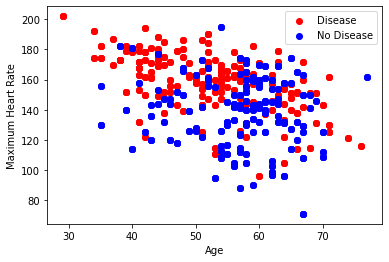

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(x=df.age[df.target==1],y=df.thalach[(df.target==1)],c='red')
plt.scatter(x=df.age[df.target==0],y=df.thalach[(df.target==0)],c='blue')
plt.legend(['Disease','No Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

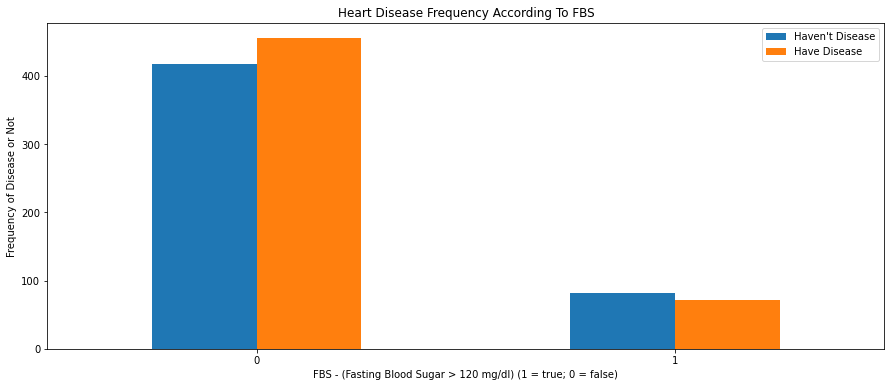

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

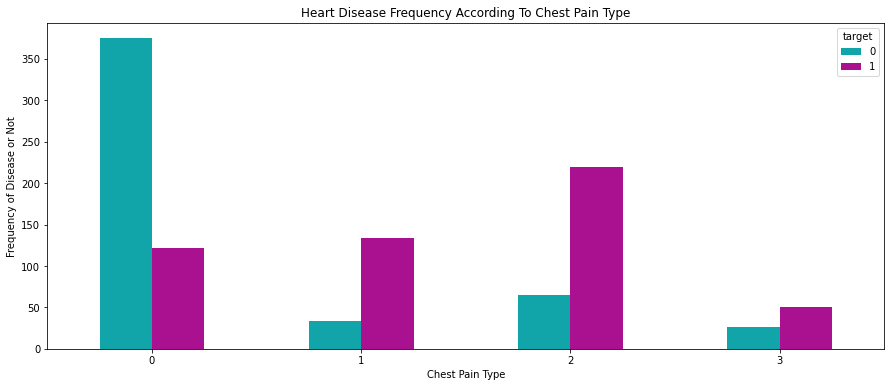

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

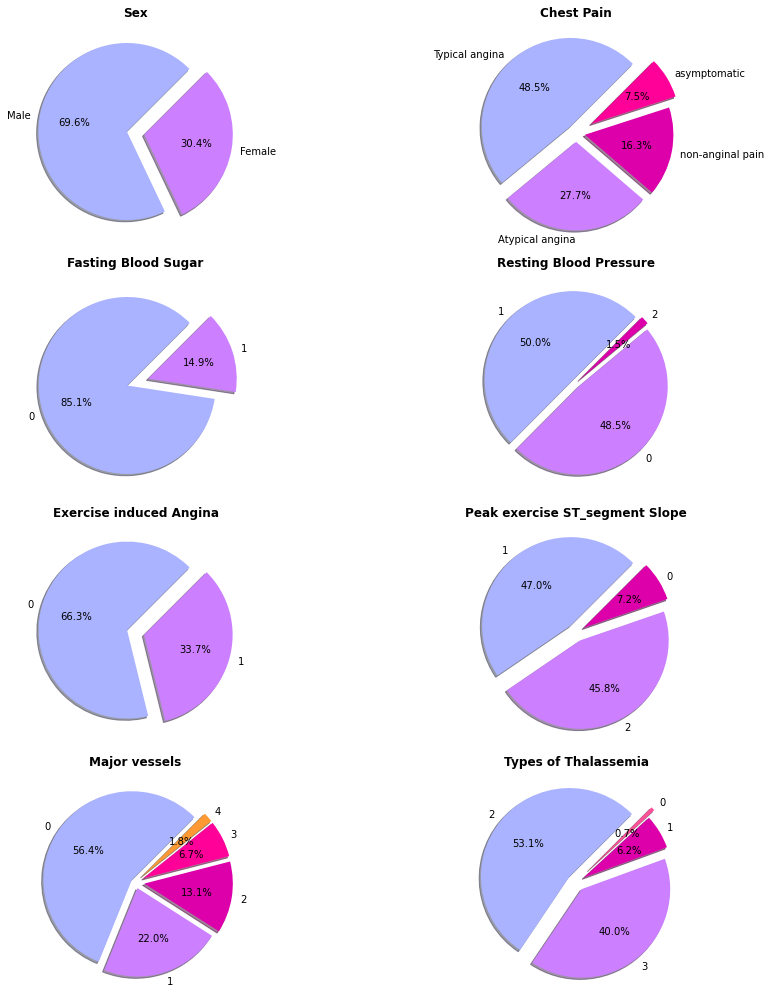

<Figure size 432x288 with 0 Axes>

In [15]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = ["Male", "Female"]
values = df['sex'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax1.set_title("Sex", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Typical angina", "Atypical angina","non-anginal pain","asymptomatic"]
values = df['cp'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099'],shadow=True,startangle=45,explode=[0.1, 0.1, 0.1, 0.2])
ax2.set_title("Chest Pain", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['fbs'].value_counts().index.tolist()[:2]
values = df['fbs'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Fasting Blood Sugar", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['restecg'].value_counts().index.tolist()[:3]
values = df['restecg'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[ 0.05, 0.05, 0.05])
ax4.set_title("Resting Blood Pressure", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['exang'].value_counts().index.tolist()[:2]
values = df['exang'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF'],shadow=True, startangle=45,explode=[0.1, 0.1])
ax5.set_title("Exercise induced Angina", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['slope'].value_counts().index.tolist()[:3]
values = df['slope'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#AAb3ff','#CC80FF','#DD00AA'],shadow=True,startangle=45,explode=[  0.1, 0.1, 0.1])
ax6.set_title("Peak exercise ST_segment Slope", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['ca'].value_counts().index.tolist()[:5]
values = df['ca'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1,0.1],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF0099','#FF9933'])
ax7.set_title("Major vessels", fontdict={'fontsize': 12},fontweight ='bold')

labels = df['thal'].value_counts().index.tolist()[:4]
values = df['thal'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.2],colors=['#AAb3ff','#CC80FF','#DD00AA','#FF5099'])
ax8.set_title("Types of Thalassemia", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

plt.savefig("PiePlots.png")

### MODELING

In [16]:
y = df.target.values
x = df.drop(['target'], axis = 1)

In [17]:
# Splitting into train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

#### Using LogisticRegression

In [18]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 87.01%


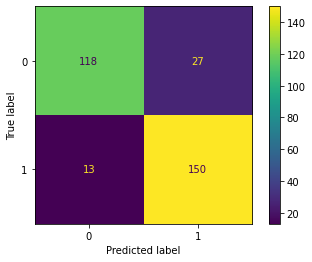

In [19]:
# Confusion matrix.
Y_pred_lr = lr.predict(x_test)
conf_mat = metrics.confusion_matrix(y_test,Y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=lr.classes_); #fn
disp.plot()
plt.savefig("LRcrr.png")
plt.show()

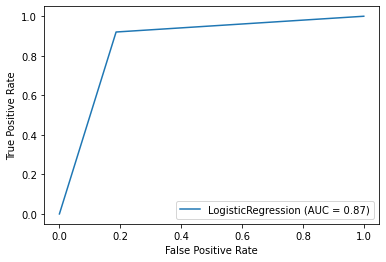

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_lr)
roc_auc = auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='LogisticRegression')
display.plot();

### DecisionTree

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


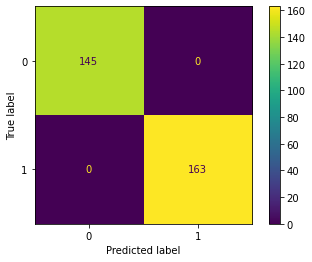

In [22]:
# Confusion matrix.
Y_pred_dt = dtc.predict(x_test)
conf_mat = metrics.confusion_matrix(y_test,Y_pred_dt, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=lr.classes_); #fn
disp.plot()
plt.savefig("DTcrr.png")
plt.show()

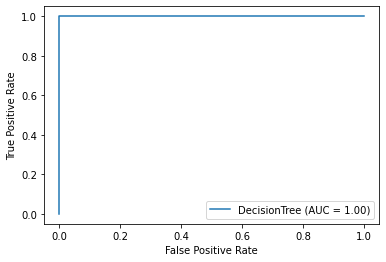

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_dt)
roc_auc = auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='DecisionTree')
display.plot();

### Using KNNClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

acc = knn.score(x_test, y_test)*100
accuracies['KNN Classififer'] = acc
print("KNN Classifier Accuracy {:.2f}%".format(acc))

KNN Classifier Accuracy 74.35%


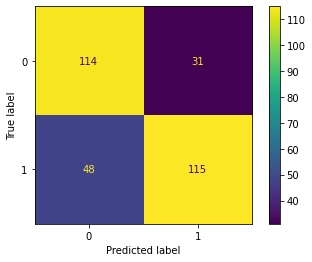

In [25]:
# Confusion matrix.
Y_pred_kn = knn.predict(x_test)
conf_mat = metrics.confusion_matrix(y_test,Y_pred_kn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=lr.classes_); #fn
disp.plot()
plt.savefig("knn.png")
plt.show()

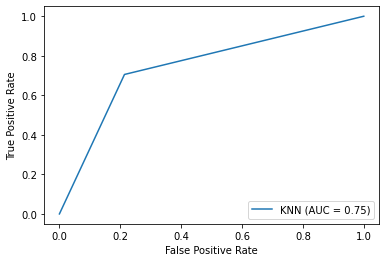

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_kn)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='KNN')
display.plot();

### Using SVM
<p> We used GridSearchCV to find the best parameters</p>

In [27]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10,100,1000], 
              'gamma': [1, 0.1, 0.01,0.001,0.005],
              'kernel': ['rbf','gamma']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.503 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.507 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=gamma;, score=nan total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.944 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END .......C=10, ga

[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.937 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.986 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=gamma;, score=nan total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=gamma;, score=nan total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=gamma;, score=nan total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=gamma;, score=nan total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=gamma;, score=nan total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.958 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.958 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.951 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.005],
                         'kernel': ['rbf', 'gamma']},
             verbose=3)

In [28]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)


In [29]:
acc = grid.score(x_test, y_test)*100
accuracies['GridSearchSVM Classififer'] = acc
print("GridSearchSVM Classifier Accuracy {:.2f}%".format(acc))

GridSearchSVM Classifier Accuracy 100.00%


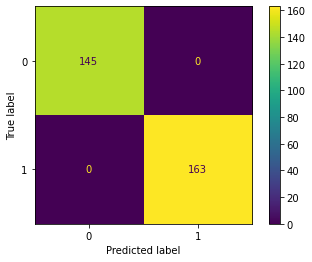

In [30]:
# Confusion matrix.
Y_pred_sv = grid.predict(x_test)
conf_mat = metrics.confusion_matrix(y_test,Y_pred_sv, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=lr.classes_); #fn
disp.plot()
plt.savefig("svm.png")
plt.show()

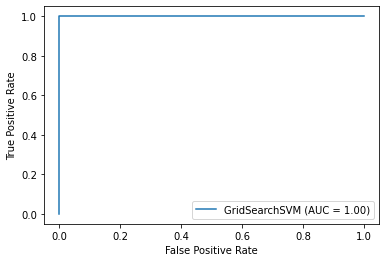

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_sv)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='GridSearchSVM')
display.plot();

### Using CNN

In [32]:
print("shape of train data is:", x_train.shape)
print("shape of train label data is:", y_train.shape)

shape of train data is: (717, 13)
shape of train label data is: (717,)


In [33]:
y_train.shape

(717,)

In [34]:
# Neural Network
import keras 
from keras.models import Sequential 
from keras.layers import Dense


# Initialising the NN
model = Sequential()

# layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 126       
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 5)                 50        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compiling the NN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Early Stopping and Callbacks
Early_Stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.01,
                              patience=10,
                              mode='auto')

from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='checkpoints/best_model.h5', monitor='val_accuracy', save_best_only=True)



# Train the NN
history = model.fit(x_train, y_train, batch_size = 32, epochs = 200,callbacks=[Early_Stopping, checkpoint], validation_data=(x_test,y_test))

Epoch 1/200
23/23 [==============================] - 1s 21ms/step - loss: 0.6932 - accuracy: 0.4895 - val_loss: 0.6932 - val_accuracy: 0.4708
Epoch 2/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5390
Epoch 3/200
23/23 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5063 - val_loss: 0.6924 - val_accuracy: 0.5292
Epoch 4/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6921 - accuracy: 0.5439 - val_loss: 0.6903 - val_accuracy: 0.7370
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6877 - accuracy: 0.6346 - val_loss: 0.6831 - val_accuracy: 0.6429
Epoch 6/200
23/23 [==============================] - 0s 7ms/step - loss: 0.6768 - accuracy: 0.6639 - val_loss: 0.6594 - val_accuracy: 0.7597
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6507 - accuracy: 0.7057 - val_loss: 0.6147 - val_accuracy: 0.7370
Epoch 8/200


In [36]:
y_pred = model.predict(x_test)

10/10 [==============================] - 0s 3ms/step


In [37]:
acc = model.evaluate(x_test, y_test)
print(acc)
accuracies['CNN'] = acc[1]

10/10 [==============================] - 0s 6ms/step - loss: 0.3379 - accuracy: 0.8604
[0.3379165828227997, 0.8603895902633667]


In [38]:
# Confusion matrix.
Y_pred_cnn = model.predict(x_test)
Y_pred_cnn = (Y_pred_cnn < 0.5).astype(np.int)

10/10 [==============================] - 0s 2ms/step


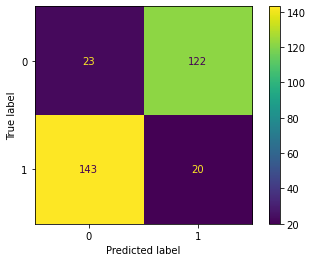

In [39]:
# Confusion matrix.
conf_mat = metrics.confusion_matrix(y_test,Y_pred_cnn, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,  display_labels=None); #fn
disp.plot()
plt.show()

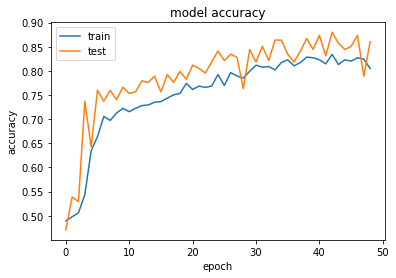

In [40]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

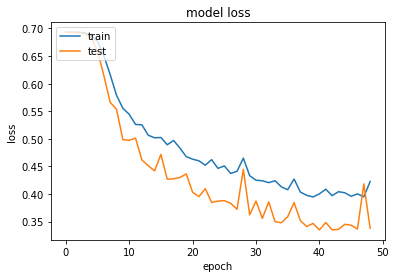

In [41]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
accuracies =  pd.DataFrame(accuracies, index=[0]).T
accuracies

,0
Logistic Regression,87.012987
Decision Tree,100.000000
KNN Classififer,74.350649
GridSearchSVM Classififer,100.000000
CNN,0.860390


### Our best performing model is The SVM Classifier in which we have performed Hyperparameter tuning using GridsearchCV, other models may also perform better if we tuned the parameters

In [44]:
# Saving the best model
import pickle
filename = 'finalized_model.sav'
pickle.dump(grid, open(filename, 'wb'))

# To load
# pick_in = open('/content/drive/MyDrive/kolapo/data1.pickle', 'rb')
# data = pickle.load(pick_in)
# pick_in.close()

### Summary

In this notebook, a classification model for heart disease was constructed using a heart disease dataset. The process began with exploring and analyzing the data, followed by preparation and cleaning. Five different models were then created for heart disease classification, and the best performing model was selected and saved for future use.
    